<a href="https://colab.research.google.com/github/KimiaDN/Bank-Marketing/blob/main/BankMarketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Import Libraries***

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics

#***Preprocessing***

## Read Data

In [ ]:
# Read data from Drive
df = pd.read_csv('/content/drive/MyDrive/ColabData/bank.csv')
df.head(20)

,number,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,5,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,6,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,7,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,8,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,9,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,10,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


## Convert Text to Number

In [ ]:
job = np.array(df['job'])
jobClass = np.empty_like(job)
for i in range(len(job)):
  if job[i] == 'admin.':
    jobClass[i] = 0
  elif job[i] == 'services':
    jobClass[i] = 1
  elif job[i] == 'technician':
    jobClass[i] = 2
  elif job[i] == 'retired':
    jobClass[i] = 3
  elif job[i] == 'self-employed':
    jobClass[i] = 4
  elif job[i] == 'blue-collar':
    jobClass[i] = 5
  elif job[i] == 'student':
    jobClass[i] = 6
  elif job[i] == 'entrepreneur':
    jobClass[i] = 7
  elif job[i] == 'housemaid':
    jobClass[i] = 8
  elif job[i] == 'management':
    jobClass[i] = 9
  elif job[i] == 'unemployed':
    jobClass[i] = 10
  elif job[i] == 'unknown':
    jobClass[i] = None


df['job'] = jobClass

In [ ]:
marital = np.array(df['marital'])
marirtalClass = np.empty_like(marital)
for i in range(len(marital)):
  if marital[i] == 'married':
    marirtalClass[i] = 0
  elif marital[i] == 'single':
    marirtalClass[i] = 1
  elif marital[i] == 'divorced':
    marirtalClass[i] = 2

df['marital'] = marirtalClass

In [ ]:
edu = np.array(df['education'])
eduClass = np.empty_like(edu)
for i in range(len(edu)):
  if edu[i] == 'secondary':
    eduClass[i] = 0
  elif edu[i] == 'primary':
    eduClass[i] = 1
  elif edu[i] == 'tertiary':
    eduClass[i] = 2
  elif edu[i] == 'unknown':
    eduClass[i] = None


df['education'] = eduClass

In [ ]:
default = np.array(df['default'])
defaultClass = np.empty_like(default)
for i in range(len(default)):
  if default[i] == 'yes':
    defaultClass[i] = 1
  elif default[i] == 'no':
    defaultClass[i] = 0

df['default'] = defaultClass

In [ ]:
housing = np.array(df['housing'])
housingClass = np.empty_like(housing)
for i in range(len(housing)):
  if housing[i] == 'yes':
    housingClass[i] = 1
  elif housing[i] == 'no':
    housingClass[i] = 0

df['housing'] = housingClass

In [ ]:
loan = np.array(df['loan'])
loanClass = np.empty_like(loan)
for i in range(len(loan)):
  if loan[i] == 'yes':
    loanClass[i] = 1
  elif loan[i] == 'no':
    loanClass[i] = 0

df['loan'] = loanClass

In [ ]:
contact = np.array(df['contact'])
contactClass = np.empty_like(contact)
for i in range(len(contact)):
  if contact[i] == 'telephone':
    contactClass[i] = 0
  elif contact[i] == 'cellular':
    contactClass[i] = 1
  elif contact[i] == 'unknown':
    contactClass[i] = None


df['contact'] = contactClass

In [ ]:
month = np.array(df['month'])
monthClass = np.empty_like(month)
for i in range(len(month)):
  if month[i] == 'jan':
    monthClass[i] = 1
  elif month[i] == 'feb':
    monthClass[i] = 2
  elif month[i] == 'mar':
    monthClass[i] = 3
  elif month[i] == 'apr':
    monthClass[i] = 4
  elif month[i] == 'may':
    monthClass[i] = 5
  elif month[i] == 'jun':
    monthClass[i] = 6
  elif month[i] == 'jul':
    monthClass[i] = 7
  elif month[i] == 'aug':
    monthClass[i] = 8
  elif month[i] == 'sep':
    monthClass[i] = 9
  elif month[i] == 'oct':
    monthClass[i] = 10
  elif month[i] == 'nov':
    monthClass[i] = 11
  elif month[i] == 'dec':
    monthClass[i] = 12



df['month'] = monthClass

In [ ]:
poutcome = np.array(df['poutcome'])
poutcomeClass = np.empty_like(poutcome)
for i in range(len(poutcome)):
  if poutcome[i] == 'failure':
    poutcomeClass[i] = 0
  elif poutcome[i] == 'success':
    poutcomeClass[i] = 1
  elif poutcome[i] == 'other':
    poutcomeClass[i] = 2
  elif poutcome[i] == 'unknown':
    poutcomeClass[i] = None


df['poutcome'] = poutcomeClass

In [ ]:
y = np.array(df['y'])
yClass = np.empty_like(y)
for i in range(len(y)):
  if y[i] == 'yes':
    yClass[i] = 1
  elif y[i] == 'no':
    yClass[i] = 0

df['y'] = yClass

In [ ]:
df.head(20)

,number,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,30,10,0,1,0,1787,0,0,1,19,10,79,1,-1,0,None,0
1,2,33,1,0,0,0,4789,1,1,1,11,5,220,1,339,4,0,0
2,3,35,9,1,2,0,1350,1,0,1,16,4,185,1,330,1,0,0
3,4,30,9,0,2,0,1476,1,1,None,3,6,199,4,-1,0,None,0
4,5,59,5,0,0,0,0,1,0,None,5,5,226,1,-1,0,None,0
5,6,35,9,1,2,0,747,0,0,1,23,2,141,2,176,3,0,0
6,7,36,4,0,2,0,307,1,0,1,14,5,341,1,330,2,2,0
7,8,39,2,0,0,0,147,1,0,1,6,5,151,2,-1,0,None,0
8,9,41,7,0,2,0,221,1,0,None,14,5,57,2,-1,0,None,0
9,10,43,1,0,1,0,-88,1,1,1,17,4,313,1,147,2,0,0


## Handling Missing Values

In [ ]:
df.shape

(4521, 18)

In [ ]:
df.isna().any(axis=0)

number       False
age          False
job           True
marital      False
education     True
default      False
balance      False
housing      False
loan         False
contact       True
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome      True
y            False
dtype: bool

In [ ]:
df.isnull().any(axis=0)

number       False
age          False
job           True
marital      False
education     True
default      False
balance      False
housing      False
loan         False
contact       True
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome      True
y            False
dtype: bool

In [ ]:
print(df.isnull().sum())

number          0
age             0
job            38
marital         0
education     187
default         0
balance         0
housing         0
loan            0
contact      1324
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64


In [ ]:
df.drop(['poutcome'], inplace=True, axis=1)

In [ ]:
df.drop(['number'], inplace=True, axis=1)

In [ ]:
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'y'],
      dtype='object')


In [ ]:
df.isnull().sum().sum()

1549

In [ ]:
print(df.isnull().sum())

age             0
job            38
marital         0
education     187
default         0
balance         0
housing         0
loan            0
contact      1324
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
y               0
dtype: int64


In [ ]:
df.head(50)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,30,10,0,1,0,1787,0,0,1,19,10,79,1,-1,0,0
1,33,1,0,0,0,4789,1,1,1,11,5,220,1,339,4,0
2,35,9,1,2,0,1350,1,0,1,16,4,185,1,330,1,0
3,30,9,0,2,0,1476,1,1,None,3,6,199,4,-1,0,0
4,59,5,0,0,0,0,1,0,None,5,5,226,1,-1,0,0
5,35,9,1,2,0,747,0,0,1,23,2,141,2,176,3,0
6,36,4,0,2,0,307,1,0,1,14,5,341,1,330,2,0
7,39,2,0,0,0,147,1,0,1,6,5,151,2,-1,0,0
8,41,7,0,2,0,221,1,0,None,14,5,57,2,-1,0,0
9,43,1,0,1,0,-88,1,1,1,17,4,313,1,147,2,0


In [ ]:
knn_cols = ['job', 'education', 'contact']
knn_df = df[knn_cols]
imputer = KNNImputer(n_neighbors = 3)
impute_knn = KNNImputer(n_neighbors=2)
knn_output = impute_knn.fit_transform(knn_df)
knn_output

array([[10.,  1.,  1.],
       [ 1.,  0.,  1.],
       [ 9.,  2.,  1.],
       ...,
       [ 2.,  0.,  1.],
       [ 5.,  0.,  1.],
       [ 7.,  2.,  1.]])

In [ ]:
knn_output_normal = np.empty_like(knn_output)
for x in range(knn_output.shape[0]):
  for y in range(knn_output.shape[1]):
    knn_output_normal[x][y] = np.round(knn_output[x][y])

knn_output_job = knn_output_normal[:,0]
knn_output_education = knn_output_normal[:,1]
knn_output_contact = knn_output_normal[:,2]

In [ ]:
df['job'] = knn_output_job
df['education'] = knn_output_education
df['contact'] = knn_output_contact

In [ ]:
df.head(50)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,30,10.0,0,1.0,0,1787,0,0,1.0,19,10,79,1,-1,0,0
1,33,1.0,0,0.0,0,4789,1,1,1.0,11,5,220,1,339,4,0
2,35,9.0,1,2.0,0,1350,1,0,1.0,16,4,185,1,330,1,0
3,30,9.0,0,2.0,0,1476,1,1,1.0,3,6,199,4,-1,0,0
4,59,5.0,0,0.0,0,0,1,0,1.0,5,5,226,1,-1,0,0
5,35,9.0,1,2.0,0,747,0,0,1.0,23,2,141,2,176,3,0
6,36,4.0,0,2.0,0,307,1,0,1.0,14,5,341,1,330,2,0
7,39,2.0,0,0.0,0,147,1,0,1.0,6,5,151,2,-1,0,0
8,41,7.0,0,2.0,0,221,1,0,1.0,14,5,57,2,-1,0,0
9,43,1.0,0,1.0,0,-88,1,1,1.0,17,4,313,1,147,2,0


In [ ]:
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64


## Data Visualization

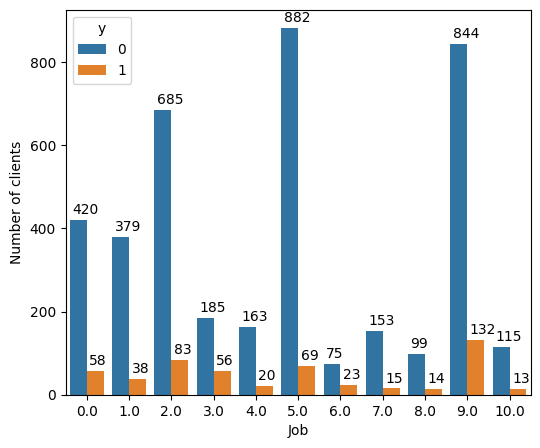

In [ ]:
plt.figure(figsize = (6,5))
ax = sns.countplot(x='job',hue='y' ,data = df)
plt.xlabel('Job')
plt.ylabel('Number of clients')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.06, p.get_height()+15))

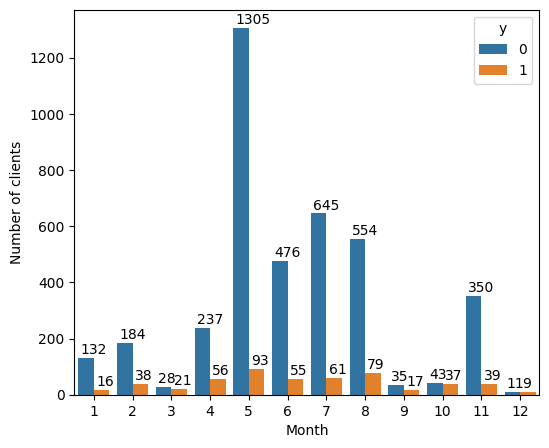

In [ ]:
plt.figure(figsize = (6,5))
ax = sns.countplot(x='month',hue='y' ,data = df)
plt.xlabel('Month')
plt.ylabel('Number of clients')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.06, p.get_height()+15))



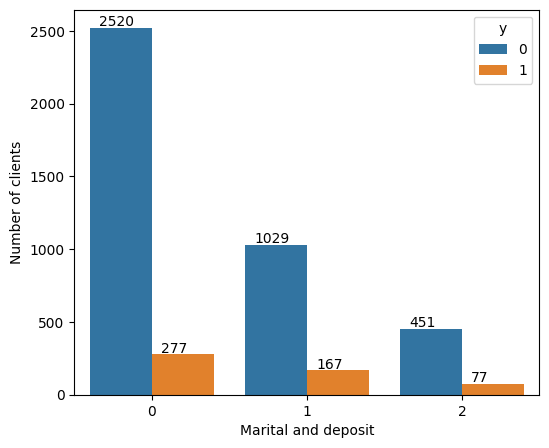

In [ ]:
plt.figure(figsize = (6,5))
ax = sns.countplot(x='marital',hue='y' ,data = df)
plt.xlabel('Marital and deposit')
plt.ylabel('Number of clients')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.06, p.get_height()+15))

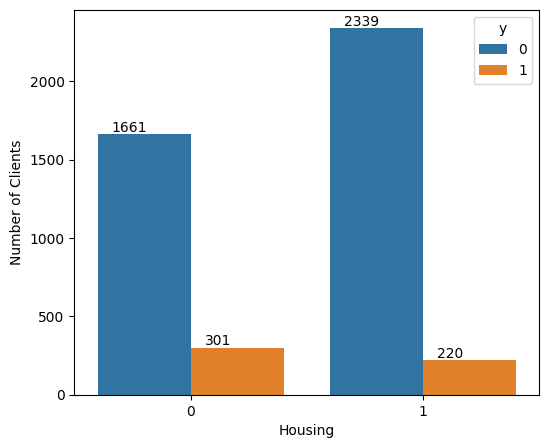

In [ ]:
plt.figure(figsize = (6,5))
ax = sns.countplot(x='housing',hue='y' ,data = df)
plt.xlabel('Housing')
plt.ylabel('Number of Clients')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.06, p.get_height()+15))

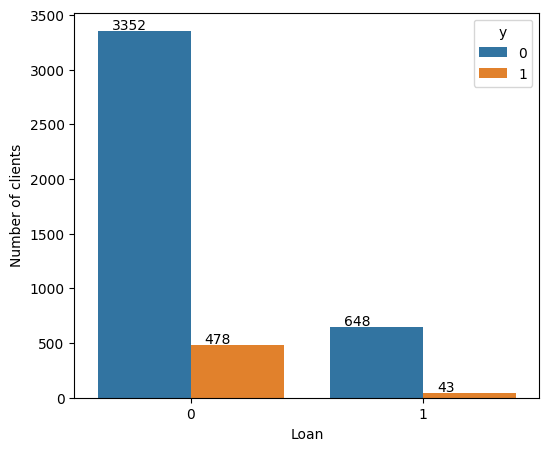

In [ ]:
plt.figure(figsize = (6,5))
ax = sns.countplot(x='loan',hue='y' ,data = df )
plt.xlabel('Loan')
plt.ylabel('Number of clients')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.06, p.get_height()+15))

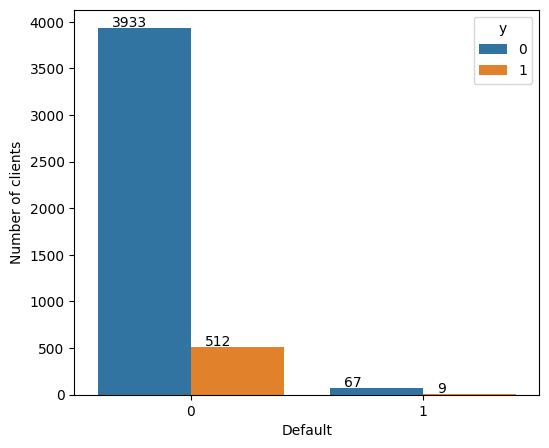

In [ ]:
plt.figure(figsize = (6,5))
ax = sns.countplot(x='default',hue='y' ,data = df)
plt.xlabel('Default')
plt.ylabel('Number of clients')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.06, p.get_height()+15))

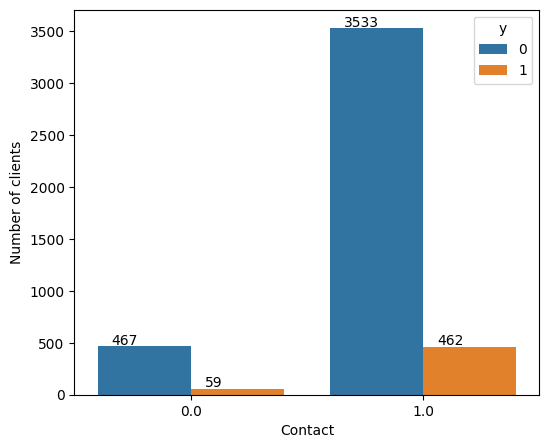

In [ ]:
plt.figure(figsize = (6,5))
ax = sns.countplot(x='contact',hue='y' ,data = df)
plt.xlabel('Contact')
plt.ylabel('Number of clients')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.06, p.get_height()+15))

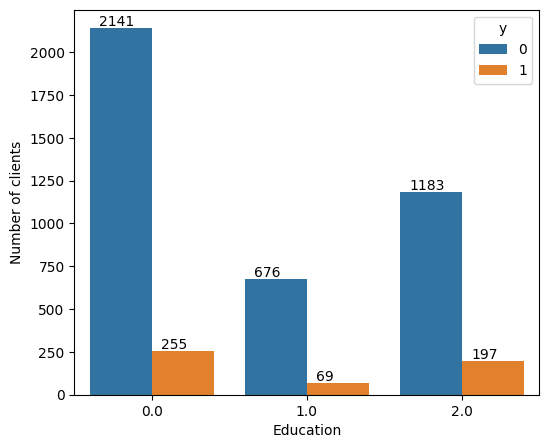

In [ ]:
plt.figure(figsize = (6,5))
ax = sns.countplot(x='education',hue='y' ,data = df)
plt.xlabel('Education')
plt.ylabel('Number of clients')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.06, p.get_height()+15))

# ***Implementing The Model***

## Data Splitting

In [ ]:
df.dtypes

age            int64
job          float64
marital       object
education    float64
default       object
balance        int64
housing       object
loan          object
contact      float64
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
y             object
dtype: object

In [ ]:
df = df.astype(int)

In [ ]:
df.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
y            int64
dtype: object

In [ ]:
x = np.array(df.iloc[:, :-1])
y = np.array(df['y'])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.8, random_state=12)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(3616, 15)
(905, 15)
(3616,)
(905,)


## Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, input_shape=(15,), activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="tanh"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(12, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(12, activation="tanh"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])
model.compile(
    loss= 'binary_crossentropy',
    optimizer = tf.optimizers.Adam(learning_rate=0.001),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test))

Epoch 1/100
113/113 [==============================] - 6s 10ms/step - loss: 0.6628 - accuracy: 0.6488 - val_loss: 0.5803 - val_accuracy: 0.8177
Epoch 2/100
113/113 [==============================] - 1s 5ms/step - loss: 0.4868 - accuracy: 0.8283 - val_loss: 0.4422 - val_accuracy: 0.8751
Epoch 3/100
113/113 [==============================] - 1s 6ms/step - loss: 0.4053 - accuracy: 0.8836 - val_loss: 0.3684 - val_accuracy: 0.8751
Epoch 4/100
113/113 [==============================] - 1s 6ms/step - loss: 0.3538 - accuracy: 0.8858 - val_loss: 0.3515 - val_accuracy: 0.8762
Epoch 5/100
113/113 [==============================] - 1s 6ms/step - loss: 0.3264 - accuracy: 0.8874 - val_loss: 0.3351 - val_accuracy: 0.8751
Epoch 6/100
113/113 [==============================] - 1s 5ms/step - loss: 0.3167 - accuracy: 0.8872 - val_loss: 0.3296 - val_accuracy: 0.8729
Epoch 7/100
113/113 [==============================] - 1s 8ms/step - loss: 0.3085 - accuracy: 0.8872 - val_loss: 0.3236 - val_accuracy: 0.876

In [ ]:
model.evaluate(X_test, Y_test)

29/29 [==============================] - 0s 3ms/step - loss: 0.2847 - accuracy: 0.8785


[0.28465163707733154, 0.8784530162811279]

##Accuracy and Loss

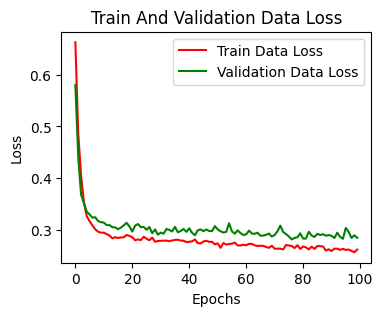

In [ ]:
from sqlalchemy import label
train_loss = history.history['loss']
val_loss = history.history['val_loss']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Loss")
plt.plot(iterations, train_loss, 'r', label = 'Train Data Loss')
plt.plot(iterations, val_loss, 'g', label = 'Validation Data Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

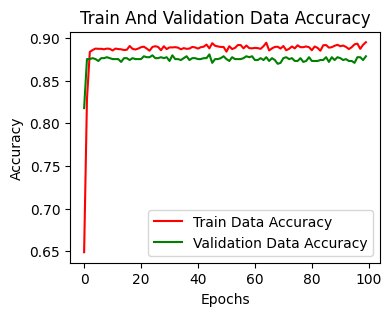

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Accuracy")
plt.plot(iterations, train_acc, 'r', label = 'Train Data Accuracy')
plt.plot(iterations, val_acc, 'g', label = 'Validation Data Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##Classification Report

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classification_train = [np.round(element) for element in y_pred_train]
y_true_train = Y_train
target_names=['No', 'Yes']
print(classification_report(y_true_train, y_pred_classification_train, target_names=target_names))

113/113 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

          No       0.91      0.98      0.94      3208
         Yes       0.59      0.24      0.34       408

    accuracy                           0.90      3616
   macro avg       0.75      0.61      0.64      3616
weighted avg       0.87      0.90      0.87      3616



In [ ]:
y_pred_test = model.predict(X_test)
y_pred_classification_test = [np.round(element) for element in y_pred_test]
y_true_test = Y_test
target_names=['No', 'Yes']
print(classification_report(y_true_test, y_pred_classification_test, target_names=target_names))

29/29 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

          No       0.89      0.98      0.93       792
         Yes       0.55      0.16      0.25       113

    accuracy                           0.88       905
   macro avg       0.72      0.57      0.59       905
weighted avg       0.85      0.88      0.85       905



##Confusion Matrix

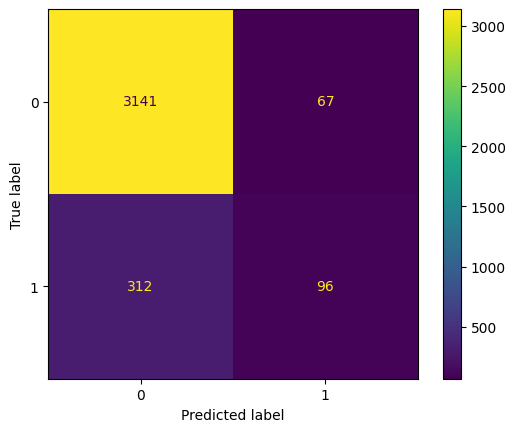

In [ ]:
actual_train = Y_train
predicted_train = y_pred_classification_train
confusion_matrix = metrics.confusion_matrix(actual_train, predicted_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

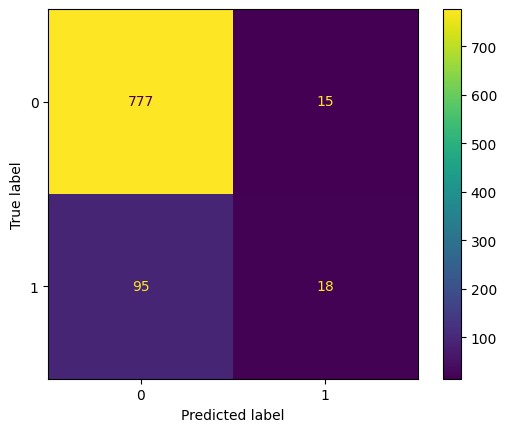

In [ ]:
actual_test = Y_test
predicted_test = y_pred_classification_test
confusion_matrix = metrics.confusion_matrix(actual_test, predicted_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()